<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/10thWeekTask/Regresi%20MLP/Regression_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 10 : Regression Model: MLP Regression

Dataset : winequality-white

Dokumentasi ChatGPT :[Link](https://chatgpt.com/share/67531444-9150-8005-bdb5-b81d86e94ab0)

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### **#Baca Dataset:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

# Load dataset
data = pd.read_csv('winequality-white.csv', delimiter=';')


### **#Pisahkan Fitur dan Target:**

In [2]:
X = data.drop('quality', axis=1).values
y = data['quality'].values

### **#Split Data:**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **#Normalisasi Data:**

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **#Convert ke Tensor:**

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


### **#Bangun MLP: Definisikan Model:**

In [6]:
class MLPRegression(nn.Module):
    def __init__(self, input_size):
        super(MLPRegression, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

input_size = X_train.shape[1]
model = MLPRegression(input_size)


### **#Definisikan Loss dan Optimizer:**

In [7]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### **#Loop Training:**

In [8]:
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer, epochs=50)


Epoch 1/50, Loss: 8.1081
Epoch 2/50, Loss: 1.6628
Epoch 3/50, Loss: 1.0894
Epoch 4/50, Loss: 0.7235
Epoch 5/50, Loss: 0.5813
Epoch 6/50, Loss: 0.5364
Epoch 7/50, Loss: 0.5226
Epoch 8/50, Loss: 0.5043
Epoch 9/50, Loss: 0.5050
Epoch 10/50, Loss: 0.4916
Epoch 11/50, Loss: 0.4870
Epoch 12/50, Loss: 0.4764
Epoch 13/50, Loss: 0.4806
Epoch 14/50, Loss: 0.4757
Epoch 15/50, Loss: 0.4751
Epoch 16/50, Loss: 0.4697
Epoch 17/50, Loss: 0.4655
Epoch 18/50, Loss: 0.4632
Epoch 19/50, Loss: 0.4601
Epoch 20/50, Loss: 0.4561
Epoch 21/50, Loss: 0.4469
Epoch 22/50, Loss: 0.4515
Epoch 23/50, Loss: 0.4406
Epoch 24/50, Loss: 0.4310
Epoch 25/50, Loss: 0.4350
Epoch 26/50, Loss: 0.4259
Epoch 27/50, Loss: 0.4281
Epoch 28/50, Loss: 0.4242
Epoch 29/50, Loss: 0.4175
Epoch 30/50, Loss: 0.4174
Epoch 31/50, Loss: 0.4109
Epoch 32/50, Loss: 0.4113
Epoch 33/50, Loss: 0.4093
Epoch 34/50, Loss: 0.4059
Epoch 35/50, Loss: 0.4134
Epoch 36/50, Loss: 0.4049
Epoch 37/50, Loss: 0.3973
Epoch 38/50, Loss: 0.3973
Epoch 39/50, Loss: 0.

### **#Evaluasi di Data Test:**

In [9]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()
    print(f"Test Loss: {total_loss/len(test_loader):.4f}")

evaluate_model(model, test_loader, criterion)


Test Loss: 0.4831


### **# Prediksi:**

In [10]:
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        y_pred.extend(predictions.numpy())
        y_true.extend(y_batch.numpy())

y_pred = np.array(y_pred).flatten()
y_true = np.array(y_true).flatten()


### **#Visualisasi Hasil:**

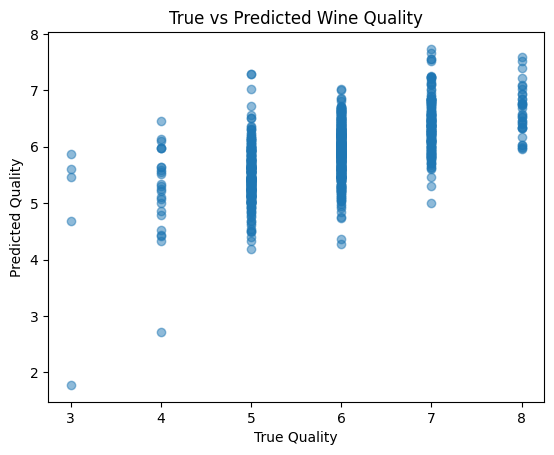

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("True vs Predicted Wine Quality")
plt.show()


### **#Modifikasi Model**

In [12]:
class FlexibleMLPRegression(nn.Module):
    def __init__(self, input_size, hidden_layers):
        """
        input_size: Jumlah fitur input
        hidden_layers: Daftar jumlah neuron di setiap hidden layer, contoh [32, 64, 128]
        """
        super(FlexibleMLPRegression, self).__init__()
        layers = []
        current_size = input_size
        for neurons in hidden_layers:
            layers.append(nn.Linear(current_size, neurons))
            layers.append(nn.ReLU())
            current_size = neurons
        layers.append(nn.Linear(current_size, 1))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


### **#Fungsi Pelatihan dan Evaluasi**

In [13]:
def train_and_evaluate(input_size, hidden_layers, train_loader, test_loader, epochs=50, lr=0.001):
    model = FlexibleMLPRegression(input_size, hidden_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    # Evaluate
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()
    avg_loss = total_loss / len(test_loader)
    return avg_loss


### **#Eksperimen Kombinasi Hidden Layer dan Neuron**

In [14]:
input_size = X_train.shape[1]
results = []

hidden_layer_configs = [
    [4], [8], [16], [32], [64],       # 1 hidden layer
    [4, 8], [8, 16], [16, 32], [32, 64], # 2 hidden layers
    [4, 8, 16], [8, 16, 32], [16, 32, 64] # 3 hidden layers
]

for config in hidden_layer_configs:
    avg_loss = train_and_evaluate(input_size, config, train_loader, test_loader)
    results.append((config, avg_loss))

# Sort by performance
results = sorted(results, key=lambda x: x[1])


### **#Visualisasi Hasil**

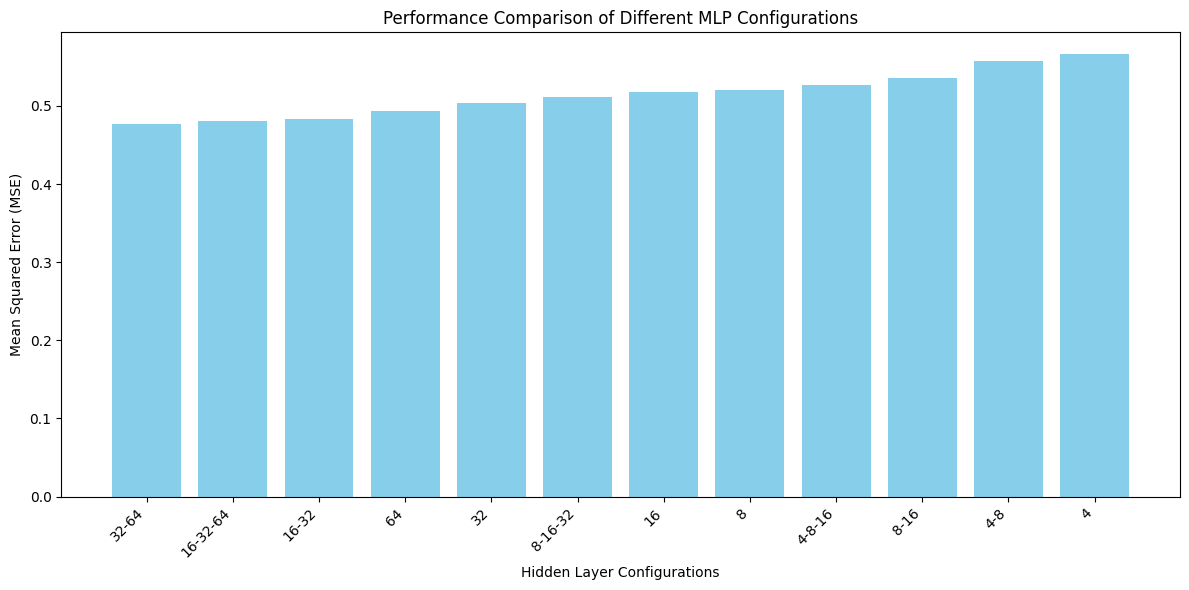

In [15]:
import matplotlib.pyplot as plt

configs = ['-'.join(map(str, config)) for config, _ in results]
losses = [loss for _, loss in results]

plt.figure(figsize=(12, 6))
plt.bar(configs, losses, color='skyblue')
plt.xlabel("Hidden Layer Configurations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Performance Comparison of Different MLP Configurations")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **#Modifikasi Model**

In [16]:
class ActivationMLPRegression(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn):
        """
        input_size: Jumlah fitur input
        hidden_layers: Daftar jumlah neuron di setiap hidden layer, contoh [32, 64, 128]
        activation_fn: Fungsi aktivasi PyTorch (contoh: nn.ReLU())
        """
        super(ActivationMLPRegression, self).__init__()
        layers = []
        current_size = input_size
        for neurons in hidden_layers:
            layers.append(nn.Linear(current_size, neurons))
            layers.append(activation_fn)
            current_size = neurons
        layers.append(nn.Linear(current_size, 1))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


### **#Fungsi Pelatihan dan Evaluasi**

In [17]:
def train_and_evaluate_activation(input_size, hidden_layers, activation_fn, train_loader, test_loader, epochs=50, lr=0.001):
    model = ActivationMLPRegression(input_size, hidden_layers, activation_fn)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    # Evaluate
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()
    avg_loss = total_loss / len(test_loader)
    return avg_loss


### **#Eksperimen Fungsi Aktivasi**

In [18]:
from torch import nn

input_size = X_train.shape[1]
hidden_layers = [32, 64]  # Contoh konfigurasi hidden layers
activation_functions = {
    "Linear": nn.Identity(),  # Linear = No activation
    "Sigmoid": nn.Sigmoid(),
    "ReLU": nn.ReLU(),
    "Softmax": nn.Softmax(dim=1),  # Tidak direkomendasikan untuk regresi (biasanya untuk klasifikasi)
    "Tanh": nn.Tanh()
}

activation_results = []
for name, activation_fn in activation_functions.items():
    try:
        avg_loss = train_and_evaluate_activation(input_size, hidden_layers, activation_fn, train_loader, test_loader)
        activation_results.append((name, avg_loss))
    except Exception as e:
        print(f"Error with activation {name}: {e}")


### **#Visualisasi Hasil**

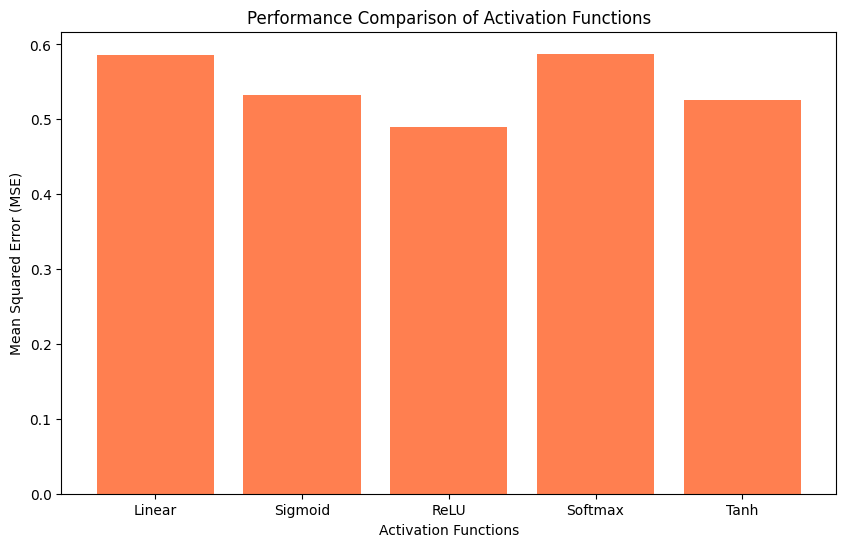

In [19]:
import matplotlib.pyplot as plt

activations = [name for name, _ in activation_results]
losses = [loss for _, loss in activation_results]

plt.figure(figsize=(10, 6))
plt.bar(activations, losses, color='coral')
plt.xlabel("Activation Functions")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Performance Comparison of Activation Functions")
plt.show()


### **#Fungsi Pelatihan dan Evaluasi**

In [20]:
def train_and_evaluate_epochs(input_size, hidden_layers, activation_fn, train_loader, test_loader, epochs_list, lr=0.001):
    results = []
    for epochs in epochs_list:
        model = ActivationMLPRegression(input_size, hidden_layers, activation_fn)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluate
        model.eval()
        total_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                total_loss += loss.item()
        avg_loss = total_loss / len(test_loader)
        results.append((epochs, avg_loss))

    return results


### **#Konfigurasi Eksperimen**

In [21]:
input_size = X_train.shape[1]
hidden_layers = [32, 64]  # Contoh konfigurasi hidden layers
activation_fn = nn.ReLU()  # Menggunakan ReLU sebagai fungsi aktivasi
epochs_list = [1, 10, 25, 50, 100, 250]

epoch_results = train_and_evaluate_epochs(input_size, hidden_layers, activation_fn, train_loader, test_loader, epochs_list)


### **#Visualisasi Hasil**

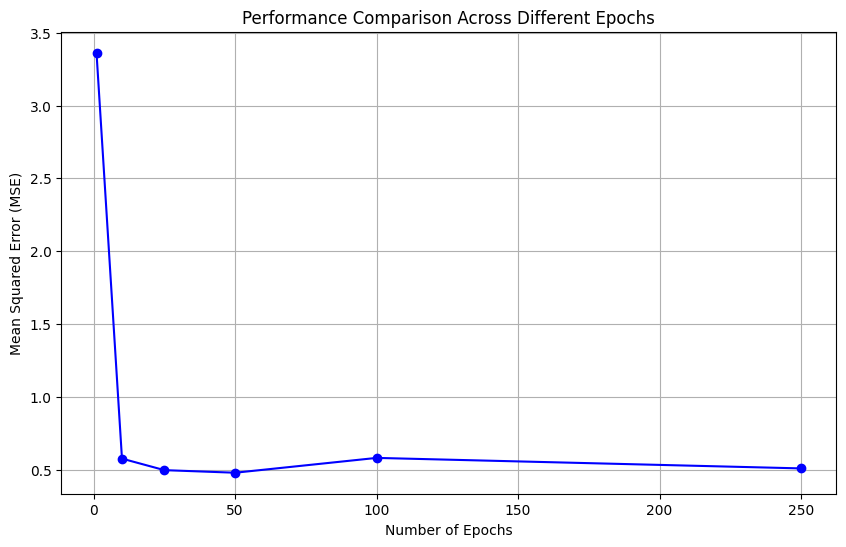

In [22]:
import matplotlib.pyplot as plt

epochs = [e for e, _ in epoch_results]
losses = [loss for _, loss in epoch_results]

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', color='blue')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Performance Comparison Across Different Epochs")
plt.grid(True)
plt.show()


### **#Modifikasi Fungsi Pelatihan**

In [23]:
def train_and_evaluate_lr(input_size, hidden_layers, activation_fn, train_loader, test_loader, epochs, learning_rates):
    results = []
    for lr in learning_rates:
        model = ActivationMLPRegression(input_size, hidden_layers, activation_fn)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluate
        model.eval()
        total_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                total_loss += loss.item()
        avg_loss = total_loss / len(test_loader)
        results.append((lr, avg_loss))

    return results


### **#Konfigurasi Eksperimen**

In [24]:
input_size = X_train.shape[1]
hidden_layers = [32, 64]  # Contoh konfigurasi hidden layers
activation_fn = nn.ReLU()  # Menggunakan ReLU sebagai fungsi aktivasi
epochs = 50  # Tetapkan jumlah epoch
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]

lr_results = train_and_evaluate_lr(input_size, hidden_layers, activation_fn, train_loader, test_loader, epochs, learning_rates)


### **#Visualisasi Hasil**

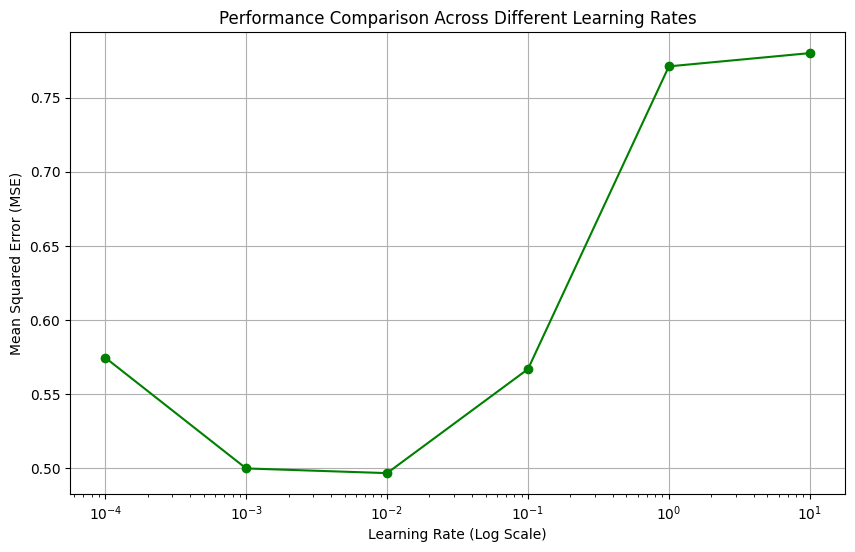

In [25]:
import matplotlib.pyplot as plt

lrs = [lr for lr, _ in lr_results]
losses = [loss for _, loss in lr_results]

plt.figure(figsize=(10, 6))
plt.semilogx(lrs, losses, marker='o', color='green')  # Gunakan log scale untuk learning rate
plt.xlabel("Learning Rate (Log Scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Performance Comparison Across Different Learning Rates")
plt.grid(True)
plt.show()


### **#Modifikasi Fungsi Pelatihan**

In [26]:
def train_and_evaluate_batch_size(input_size, hidden_layers, activation_fn, train_data, test_data, epochs, batch_sizes, lr=0.001):
    results = []
    for batch_size in batch_sizes:
        # Buat DataLoader dengan batch size yang berbeda
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

        model = ActivationMLPRegression(input_size, hidden_layers, activation_fn)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluate
        model.eval()
        total_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                total_loss += loss.item()
        avg_loss = total_loss / len(test_loader)
        results.append((batch_size, avg_loss))

    return results


### **#Menyiapkan DataLoader**

In [30]:
from torch.utils.data import DataLoader, TensorDataset
import torch

# Jika X_train dan y_train adalah numpy arrays
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

# Set batch sizes yang ingin diuji
batch_sizes = [16, 32, 64, 128, 256, 512]

# Pastikan Anda juga sudah memiliki input_size dan hidden_layers
input_size = X_train.shape[1]  # Jumlah fitur input
hidden_layers = [32, 64]  # Contoh konfigurasi hidden layers
activation_fn = nn.ReLU()  # Menggunakan ReLU sebagai fungsi aktivasi
epochs = 50  # Tetapkan jumlah epoch


### **# Konfigurasi Eksperimen**

In [31]:
input_size = X_train.shape[1]
hidden_layers = [32, 64]  # Contoh konfigurasi hidden layers
activation_fn = nn.ReLU()  # Menggunakan ReLU sebagai fungsi aktivasi
epochs = 50  # Tetapkan jumlah epoch
batch_sizes = [16, 32, 64, 128, 256, 512]

batch_size_results = train_and_evaluate_batch_size(input_size, hidden_layers, activation_fn, train_data, test_data, epochs, batch_sizes)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

### ** #Visualisasi Hasil**

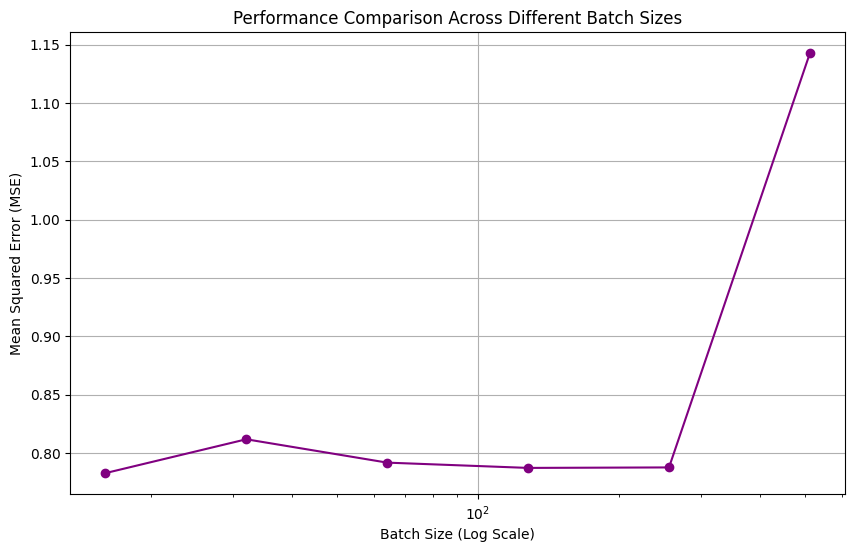

In [32]:
import matplotlib.pyplot as plt

batch_sizes = [bs for bs, _ in batch_size_results]
losses = [loss for _, loss in batch_size_results]

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, losses, marker='o', color='purple')
plt.xscale('log')  # Gunakan log scale untuk batch size
plt.xlabel("Batch Size (Log Scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Performance Comparison Across Different Batch Sizes")
plt.grid(True)
plt.show()
